In [15]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Local Search: Genetic Algorithm

## 1.Genrating Phrases

In this section we consider a toy problem: generating a target phrases (e.g. "genetic algorithm") from an initial polupation of random strings. Assume the length of the target is known.

Problem Formulation: 

1. Direct Representation: just strings.
2. Exponential Search Space: $m^l$ where $m$ is the size of the alphabet (set of characters in our interest) and $l$ is the length of the string.

Now that we want to solve it with GA:
1. Chromesome: directly use the string itself.
2. Fitness: how match/close an individual is to the target.
3. Mating: combine two strings in someway to generate a new one.

The following cells will walk you through this problem to show the basic idea of GA

In [16]:
# setting up the problem
target = 'Genetic Algorithm'
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
gene_pool = u_case + l_case + [' '] # all English chracters and white space

def init_population(pop_size, gene_pool, state_length):
    """
    Randomly initialize a population for genetic algorithm
        pop_size  :  Number of individuals in population
        gene_pool   :  List of possible values for individuals
        state_length:  The length of each individual
    """

    population = []
    for _ in range(pop_size):
        new_individual = "".join(random.choices(gene_pool, k=state_length))
        population.append(new_individual)

    return population

# test
init_pop = init_population(10, gene_pool, len(target))
init_pop

['UcqmBlytLEBBDvySk',
 'FoqiCcfptosogJhNw',
 'EDhVsLHufXGzt FkD',
 'lCgyFIxAgjVpyP  l',
 'umRpnLzIieZSwFqcb',
 'CMcFvfQsladSy YpR',
 'lMTPGaUoafezjJsZ ',
 'iPlUzVpokjsMKEsZw',
 'PkuLwirgcJnikLmcH',
 'JpDFeaVbuejtLnJSd']

In [17]:
def fitness_fn(sample):
    count = 0
    for i in range(len(target)):
        if sample[i] == target[i]:
            count += 1
    return count

# test
fitness_fn(init_pop[0])

0

In [18]:
def select(r, population, fitness_fn):
    fitnesses = [fitness_fn(x) for x in population]
    return random.choices(population, weights=fitnesses, k=r)

# test
parents = select(2, init_pop, fitness_fn)
parents

['FoqiCcfptosogJhNw', 'FoqiCcfptosogJhNw']

In [19]:
def recombine(x, y):
    n = len(x)
    c = random.randrange(0, n)
    return x[:c] + y[c:]

def mutate(x, gene_pool, pmut):
    """
    apply mutation to *x* by randomly replacing one of its gene from *gene_pool*
    """
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + new_gene + x[c + 1:]

# test
child = mutate(recombine(*parents), gene_pool, 0.1)
child

'FoqiCcfptosogJhNw'

In [20]:
# now refactor things into a *Problem* abstraction
# you can directly reuse what you have implemented above
from abc import ABC, abstractmethod

class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class PhraseGeneration(GAProblem):
    def __init__(self, target, alphabet):
        self.target = target
        self.alphabet = alphabet
        self.max_fitness = len(target)

    def init_population(self, pop_size):
        return init_population(pop_size, self.alphabet, len(self.target))

    def fitness(self, sample):
        count = 0
        for i in range(len(target)):
            if sample[i] == target[i]:
                count += 1
        return count
    
    def reproduce(self, population, mutation_rate):
        next_gen = []
        for _ in range(len(population)):
            parents = select(2, population, self.fitness)
            child = mutate(recombine(*parents), self.alphabet, mutation_rate)
            next_gen.append(child)
        return next_gen
    
    def replacement(self, old, new):
        new.extend(old)
        new.sort(key=self.fitness, reverse=True)
        return new[:len(old)]
        return new

def genetic_algorithm(
        problem: GAProblem, 
        ngen, n_init_size, mutation_rate, 
        log_intervel=100
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best): best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")         
            history.append((gen, list(map(problem.fitness, population))))
    
    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [21]:
# now set up the parameters
ngen = 1200
max_population = 120
mutation_rate = 0.08

sid = 12212006 #TODO:  replace this with your own sid
target = f"Genetic Algorithm by {sid}" 
alphabet = []
for i in range(48, 58):
    alphabet.append(chr(i))
for i in range(65, 91):
    alphabet.append(chr(i))
for i in range(97, 123):
    alphabet.append(chr(i))
alphabet.append(' ')
    

problem = PhraseGeneration(target, alphabet)

# and run it
solution, history = genetic_algorithm(problem, ngen, max_population, mutation_rate)
solution

Generation: 0/1200,	Best: KeF10Tfw8lj9fU8GmmQyJsnoX8QJA,	Fitness=4
Generation: 100/1200,	Best: GenetickAlMonitNm Ry 12K1yP0E,	Fitness=20
Generation: 200/1200,	Best: Genetic6AlgoRithm by 12K12007,	Fitness=25
Generation: 300/1200,	Best: Genetic AlgoWithm by 12K12007,	Fitness=26
Generation: 400/1200,	Best: Genetic AlgoWithm by 12K12007,	Fitness=26
Generation: 500/1200,	Best: Genetic Algorithm by 12212007,	Fitness=28
Generation: 600/1200,	Best: Genetic Algorithm by 12212006,	Fitness=29
Generation: 700/1200,	Best: Genetic Algorithm by 12212006,	Fitness=29
Generation: 800/1200,	Best: Genetic Algorithm by 12212006,	Fitness=29
Generation: 900/1200,	Best: Genetic Algorithm by 12212006,	Fitness=29
Generation: 1000/1200,	Best: Genetic Algorithm by 12212006,	Fitness=29
Generation: 1100/1200,	Best: Genetic Algorithm by 12212006,	Fitness=29


'Genetic Algorithm by 12212006'

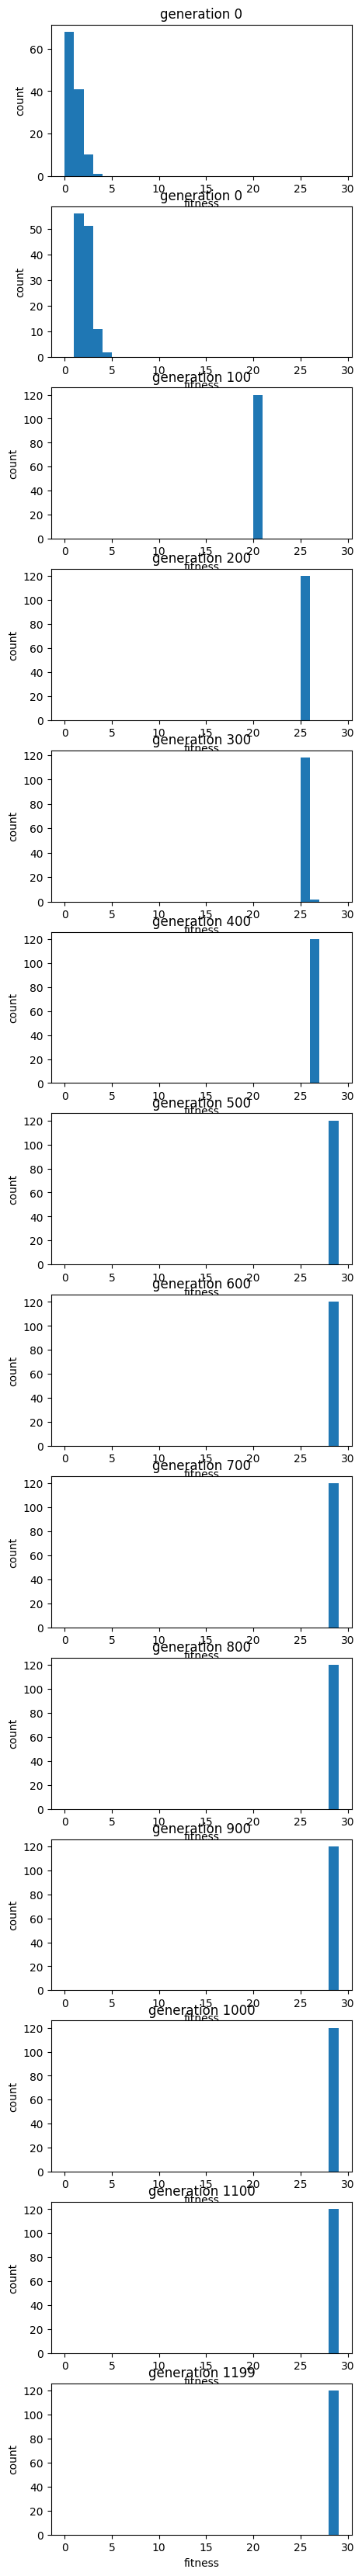

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29.])

In [22]:
# visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness+1)
plot_evolution(history, bins)
bins

## 2. N-Queens Problem

It is possible to solve the N-Queens problem with slight modifications.

For the problem:

1. Direct Representation: placement of queens.
2. Search Space: $n^n$, if we don't use any constraints.

To use GA:

Actually a new fitness function is the minimum modification you need for this problem.

Others are alomost the same as the previous problem.

In [23]:
class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness =  n*(n-1)//2 # max number if non-attacking pairs
        self.genepool = []
        for i in range(n):
            self.genepool.append(str(i))

    def init_population(self, pop_size):
        poplulation = []
        for _ in range(pop_size):
            poplulation.append("".join(random.choices(self.genepool, k=self.n)))
        return poplulation
    
    def fitness(self, queens):
        count = 0
        for i in range(self.n):
            for j in range(i+1, self.n):
                if queens[i] != queens[j] and abs(i-j) != abs(ord(queens[i]) - ord(queens[j])):
                    count += 1
        return count

    def reproduce(self, population, mutation_rate):
        next_gen = []
        for _ in range(len(population)):
            parents = select(2, population, self.fitness)
            child = mutate(recombine(*parents), self.genepool, mutation_rate)
            next_gen.append(child)
        return next_gen

    def replacement(self, old, new):
        new.extend(old)
        new.sort(key=self.fitness, reverse=True)
        return new[:len(old)]

    def __repr__(self):
        return f"{self.n}-Queens Problem"

In [31]:
from utils import plot_NQueens
ngen = 1000
init_size = 120
mutation_rate = 0.08

n = 8
problem = NQueensProblem(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)

Generation: 0/1000,	Best: 51046722,	Fitness=25
Generation: 100/1000,	Best: 30471625,	Fitness=28
Generation: 200/1000,	Best: 30471625,	Fitness=28
Generation: 300/1000,	Best: 30471625,	Fitness=28
Generation: 400/1000,	Best: 30471625,	Fitness=28
Generation: 500/1000,	Best: 30471625,	Fitness=28
Generation: 600/1000,	Best: 30471625,	Fitness=28
Generation: 700/1000,	Best: 30471625,	Fitness=28
Generation: 800/1000,	Best: 30471625,	Fitness=28
Generation: 900/1000,	Best: 30471625,	Fitness=28


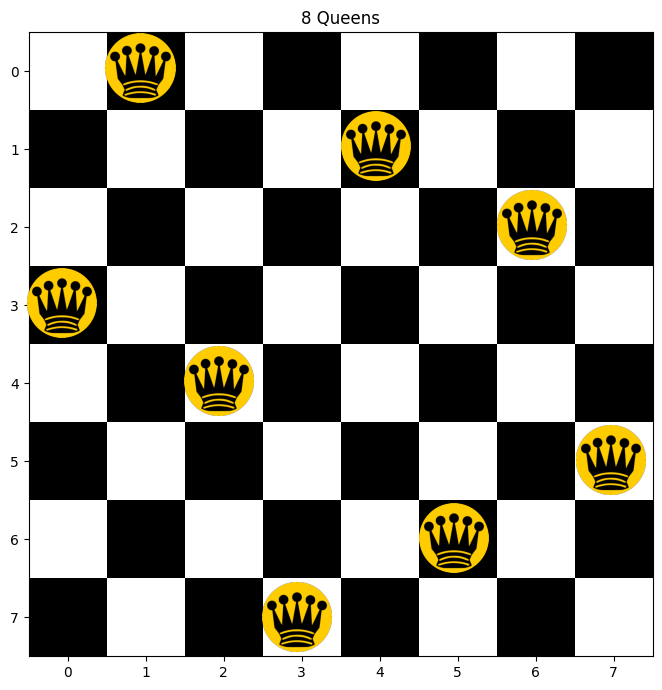

In [32]:
# Example of how to use this function
# plot_NQueens([4, 2, 0, 6, 1, 7, 5, 3])
# replace the parameter with your own results
solution_nqueens = [ord(x) - 48 for x in solution]
plot_NQueens(solution_nqueens)

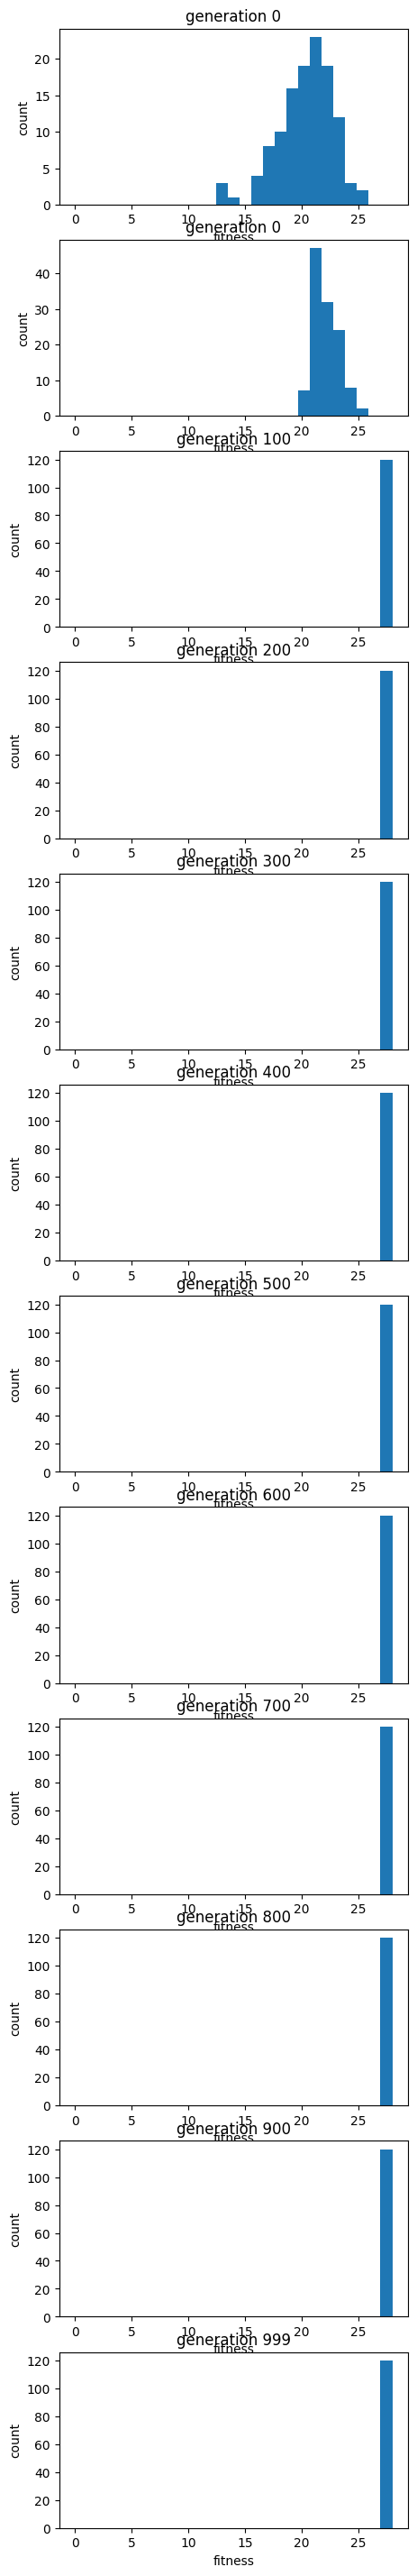

In [33]:
# Visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)